# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

/Users/benreichelt/anaconda3/envs/tf2/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [7]:
vgg16 = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

model = tf.keras.models.Sequential([
  vgg16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu', name = 'dense_feature'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


#### [5 points] Train Model

In [8]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

opt = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = 
                    uÿ`valid_batches, validation_steps=STEP_SIZE_VALID)

11
3
Epoch 1/40
10/10 [==============================] - 28s 3s/step - loss: 0.6903 - accuracy: 0.5851 - val_loss: 0.6588 - val_accuracy: 0.5500
Epoch 2/40
10/10 [==============================] - 29s 3s/step - loss: 0.6642 - accuracy: 0.5957 - val_loss: 0.4872 - val_accuracy: 0.9000
Epoch 3/40
10/10 [==============================] - 29s 3s/step - loss: 0.6048 - accuracy: 0.6915 - val_loss: 0.4134 - val_accuracy: 0.8000
Epoch 4/40
10/10 [==============================] - 29s 3s/step - loss: 0.5923 - accuracy: 0.6596 - val_loss: 0.4559 - val_accuracy: 0.9000
Epoch 5/40
10/10 [==============================] - 29s 3s/step - loss: 0.5347 - accuracy: 0.6915 - val_loss: 0.4141 - val_accuracy: 0.9000
Epoch 6/40
10/10 [==============================] - 29s 3s/step - loss: 0.4734 - accuracy: 0.7872 - val_loss: 0.3071 - val_accuracy: 0.9500
Epoch 7/40
10/10 [==============================] - 29s 3s/step - loss: 0.4583 - accuracy: 0.8511 - val_loss: 0.2760 - val_accuracy: 0.9000
Epoch 8/40
10/1

#### [5 points] Plot Accuracy and Loss During Training

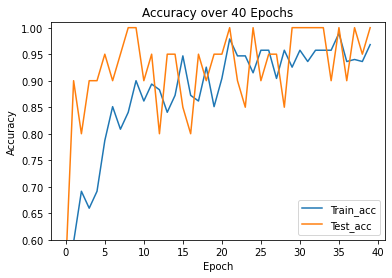

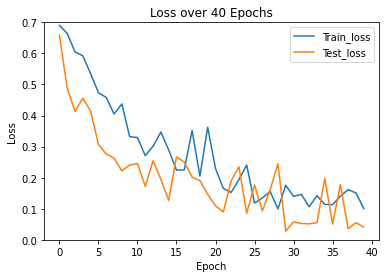

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.01])
plt.legend(loc='lower right')
plt.title('Accuracy over 40 Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.7])
plt.legend(loc='upper right')
plt.title('Loss over 40 Epochs')
plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.
18/18 [==============================] - 2s 109ms/step
covid/nejmoa2001191_f3-PA.jpeg


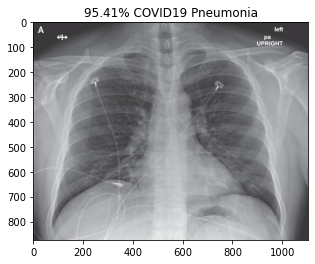

covid/nejmoa2001191_f4.jpeg


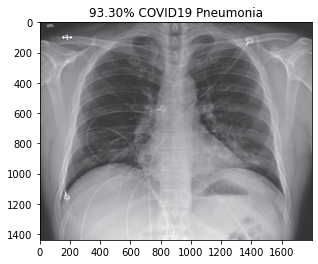

covid/nejmoa2001191_f5-PA.jpeg


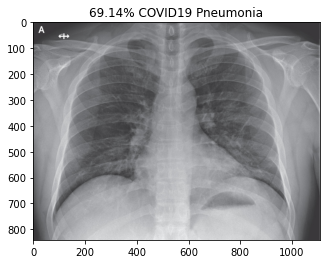

covid/radiol.2020200490.fig3.jpeg


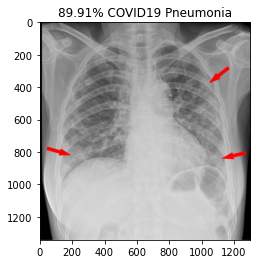

covid/ryct.2020200028.fig1a.jpeg


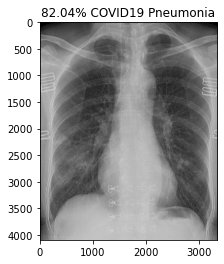

covid/ryct.2020200034.fig2.jpeg


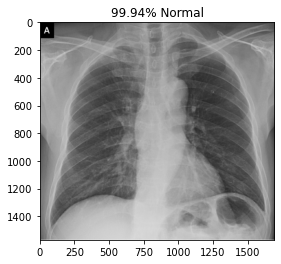

covid/ryct.2020200034.fig5-day0.jpeg


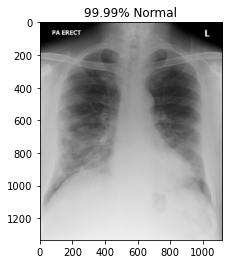

covid/ryct.2020200034.fig5-day4.jpeg


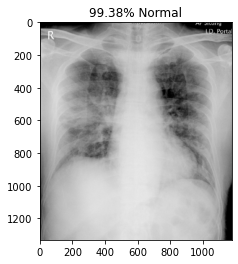

covid/ryct.2020200034.fig5-day7.jpeg


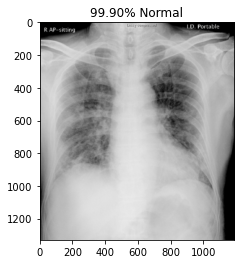

normal/NORMAL2-IM-1385-0001.jpeg


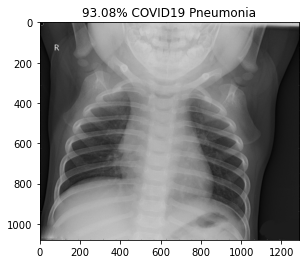

normal/NORMAL2-IM-1396-0001.jpeg


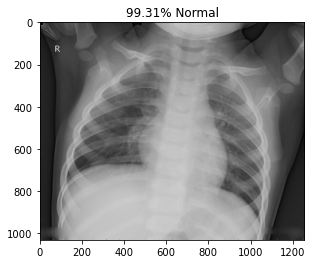

normal/NORMAL2-IM-1400-0001.jpeg


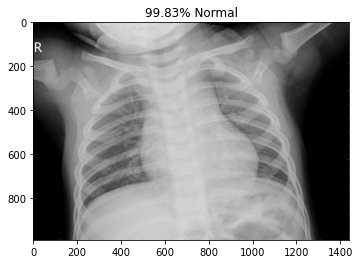

normal/NORMAL2-IM-1401-0001.jpeg


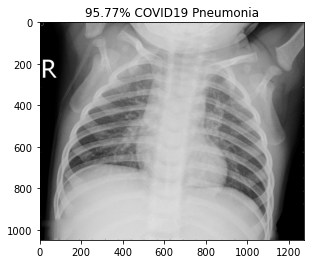

normal/NORMAL2-IM-1406-0001.jpeg


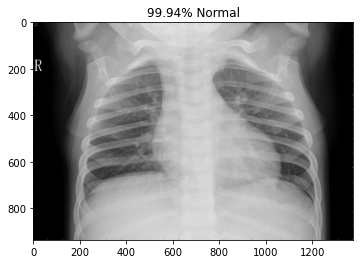

normal/NORMAL2-IM-1412-0001.jpeg


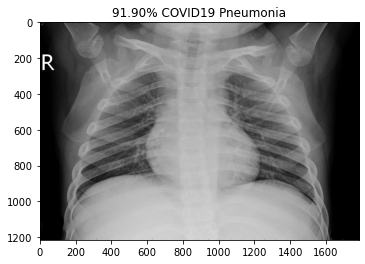

normal/NORMAL2-IM-1419-0001.jpeg


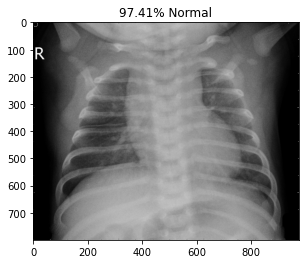

normal/NORMAL2-IM-1422-0001.jpeg


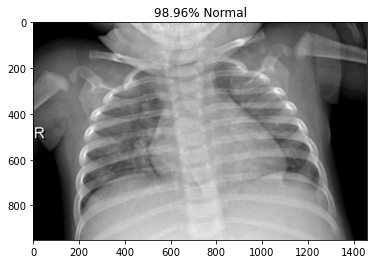

normal/NORMAL2-IM-1423-0001.jpeg


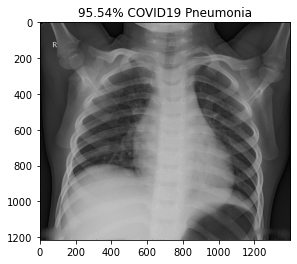

In [15]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 130 samples in 0.000s...
[t-SNE] Computed neighbors for 130 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 130 / 130
[t-SNE] Mean sigma: 2.357709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.472855
[t-SNE] KL divergence after 1000 iterations: 0.302917


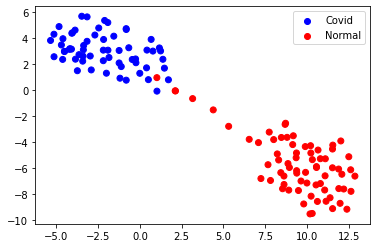

In [133]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                       outputs=model.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")


intermediate = intermediate_layer_model.predict(tsne_data_generator) 

intermediate_tsne = TSNE(n_components=2, n_iter=1000, verbose=1).fit_transform(intermediate)


actual_classes = tsne_data_generator.classes

actual_colors = []
for i in actual_classes:
    if i == 1:
        actual_colors.append('red')
    else:
        actual_colors.append('blue')

# UNSUCCESSFUL CODE TO MAKE A PROPER LEGEND
        
# unique = [(h, l) for i, (h, l) in enumerate(zip(actual_classes, actual_labels)) if l not in labels[:i]]
# plt.legend(*zip(*unique))

# def legend_no_dupes(ax):
#     unique = [(h, l) for i, (h, l) in enumerate(zip(actual_classes, actual_labels)) if l not in actual_classes[:i]]
#     ax.legend(*zip(*unique))

x = intermediate_tsne[:,0]
y = intermediate_tsne[:,1]

plt.scatter(x, y, color = actual_colors)
plt.scatter(x[0], y[0], color = actual_colors[0], label = 'Covid') #Since shuffle is set to false, first point is a 0 aka COVID point
plt.scatter(x[100], y[100], color = actual_colors[100], label = 'Normal') #Since shuffle is set to false, 100th point is a 1 aka NORMAL point
plt.legend()
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->